**Recommended Analysis**
* Q1: - Which is the most used Android version?
* Q2: - Which all categories of mob apps are existing from this dataset?
* Q3: - Which is the most installed category of mob app from this dataset?
* Q4: - How many total categories are there?
* Q5: - Which apps have got 5-star ratings
* Q6: - Which are the top 10 mob apps based on ratings?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
df=pd.read_csv("/kaggle/input/google-play-store-apps/googleplaystore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# 1.Which is the most used Android version?
# 

In [5]:
# Count the occurrences of each Android version
android_version_counts = df['Android Ver'].value_counts()

# Find the most used Android version
most_used_android_version = android_version_counts.idxmax()

# Display the most used Android version
print("The most used Android version is:", most_used_android_version)


The most used Android version is: 4.1 and up


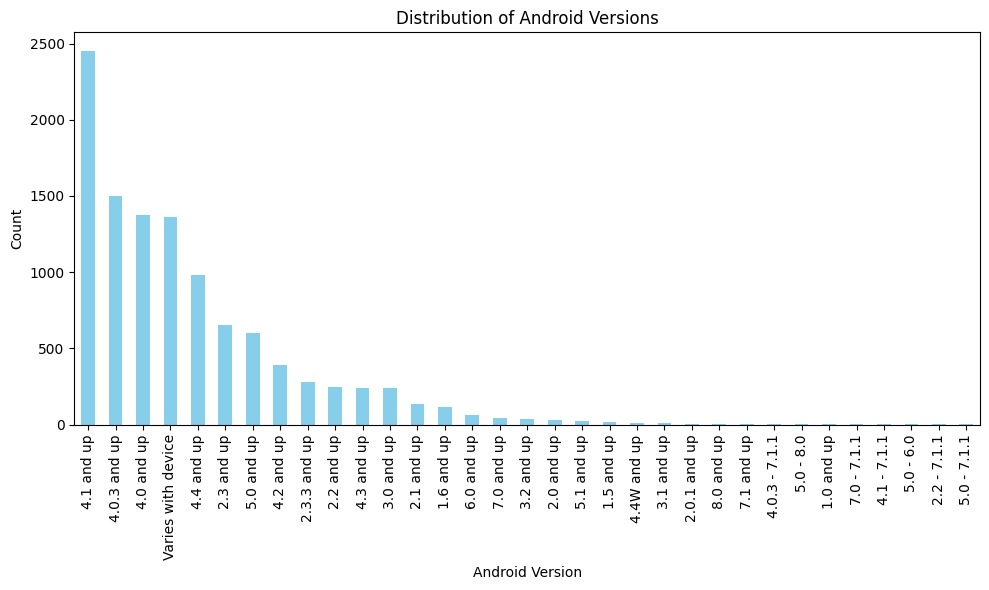

In [6]:
# Count the occurrences of each Android version
android_version_counts = df['Android Ver'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
android_version_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Android Versions')
plt.xlabel('Android Version')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


# 2.Which all categories of mob apps are existing from this dataset?
# 

In [7]:
# Get the unique categories of mobile apps
app_categories = df['Category'].unique()

# Display the list of existing categories
print("Existing categories of mobile apps:")
for category in app_categories:
    print("-", category)


Existing categories of mobile apps:
- ART_AND_DESIGN
- AUTO_AND_VEHICLES
- BEAUTY
- BOOKS_AND_REFERENCE
- BUSINESS
- COMICS
- COMMUNICATION
- DATING
- EDUCATION
- ENTERTAINMENT
- EVENTS
- FINANCE
- FOOD_AND_DRINK
- HEALTH_AND_FITNESS
- HOUSE_AND_HOME
- LIBRARIES_AND_DEMO
- LIFESTYLE
- GAME
- FAMILY
- MEDICAL
- SOCIAL
- SHOPPING
- PHOTOGRAPHY
- SPORTS
- TRAVEL_AND_LOCAL
- TOOLS
- PERSONALIZATION
- PRODUCTIVITY
- PARENTING
- WEATHER
- VIDEO_PLAYERS
- NEWS_AND_MAGAZINES
- MAPS_AND_NAVIGATION
- 1.9


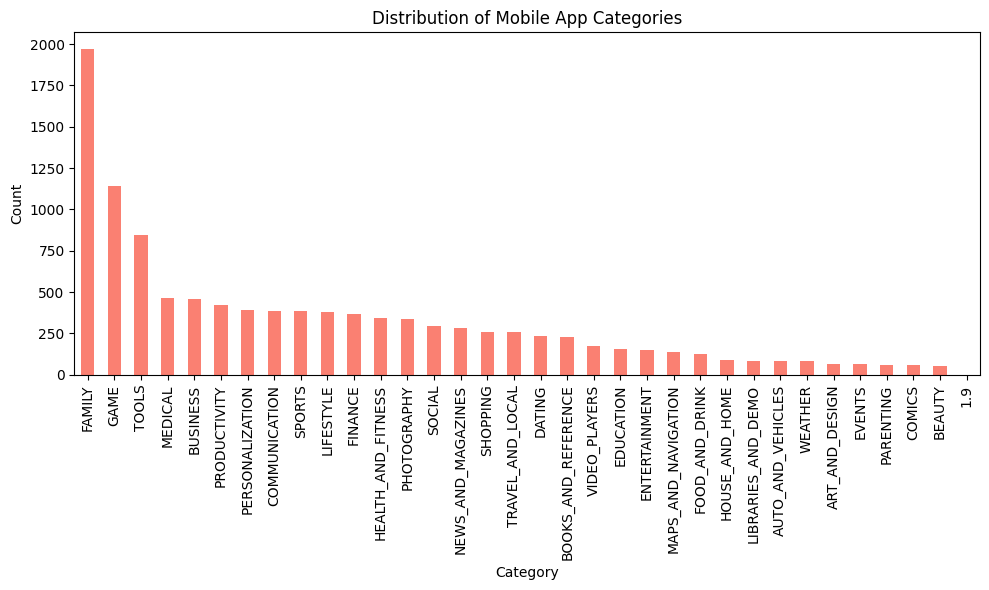

In [8]:


# Count the occurrences of each category
category_counts = df['Category'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='salmon')
plt.title('Distribution of Mobile App Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


# 3.Which is the most installed category of mob app from this dataset?

In [9]:
unique_installs_values = df['Installs'].unique()
print(unique_installs_values)



['10,000+' '500,000+' '5,000,000+' '50,000,000+' '100,000+' '50,000+'
 '1,000,000+' '10,000,000+' '5,000+' '100,000,000+' '1,000,000,000+'
 '1,000+' '500,000,000+' '50+' '100+' '500+' '10+' '1+' '5+' '0+' '0'
 'Free']


In [10]:
# Step 1: Remove the plus sign ('+')
df['Installs'] = df['Installs'].str.replace('+', '')

# Step 2: Convert 'Free' entries to '0'
df['Installs'] = df['Installs'].replace('Free', '0')

# Step 3: Convert '0' entries to NaN
df['Installs'] = df['Installs'].replace('0', np.nan)

# Step 4: Convert the remaining entries to numeric format
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')


In [11]:
# Convert 'Installs' column to numeric after removing '+' and ',' characters
df['Installs'] = df['Installs'].replace('[+,]', '', regex=True).astype(float)

# Group by 'Category' and sum the installs
category_installs = df.groupby('Category')['Installs'].sum()

# Find the category with the maximum total installs
most_installed_category = category_installs.idxmax()
total_installs_most_installed = category_installs.max()

print("The most installed category of mobile apps is:", most_installed_category)
print("Total installs in the most installed category:", total_installs_most_installed)


The most installed category of mobile apps is: FAMILY
Total installs in the most installed category: 48505.0


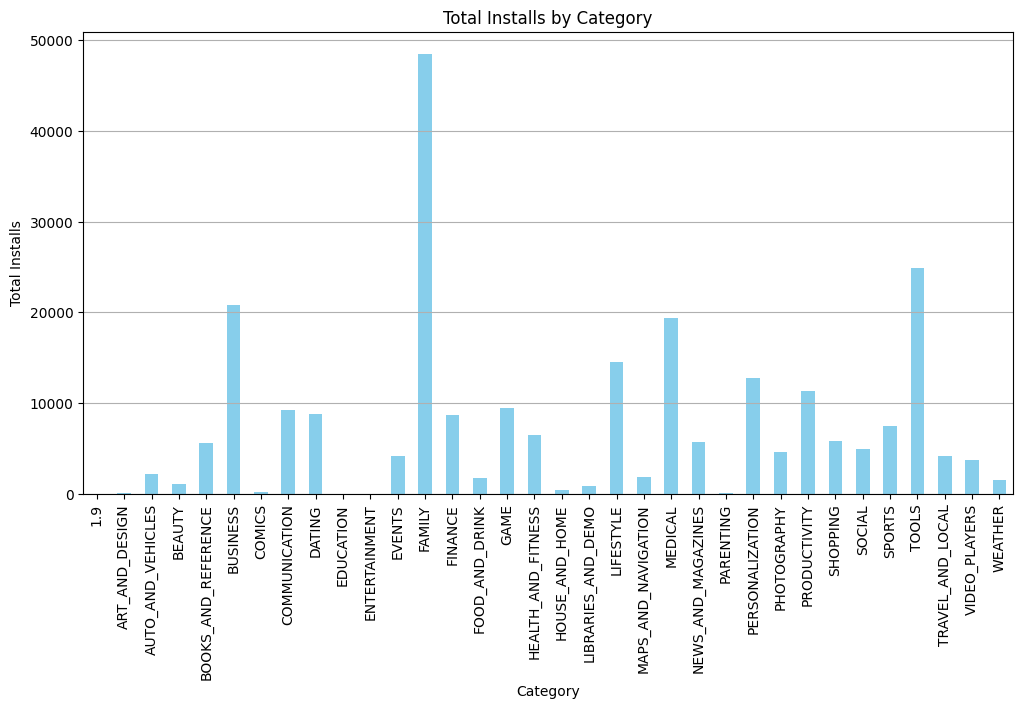

In [12]:

# Plotting
plt.figure(figsize=(12, 6))
category_installs.plot(kind='bar', color='skyblue')
plt.title('Total Installs by Category')
plt.xlabel('Category')
plt.ylabel('Total Installs')
plt.xticks(rotation=90)
plt.grid(axis='y')

plt.show()


# 4.How many total categories are there?

In [13]:
total_categories = df['Category'].nunique()
print("Total number of categories:", total_categories)


Total number of categories: 34


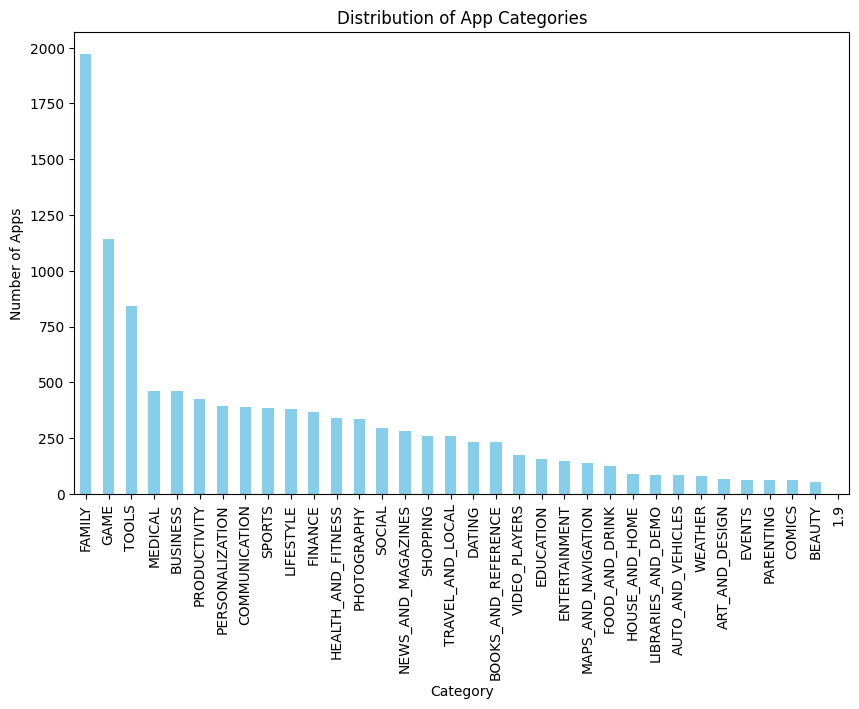

In [14]:
# Count the number of apps in each category
category_counts = df['Category'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of App Categories')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.xticks(rotation=90)
plt.show()


# 5.Which apps have got 5-star ratings

In [15]:
# Filter the DataFrame for apps with 5-star ratings
five_star_apps = df[df['Rating'] == 5.0]

# Display the apps with 5-star ratings
print(five_star_apps[['App', 'Rating']])


                                              App  Rating
329                  Hojiboy Tojiboyev Life Hacks     5.0
612                 American Girls Mobile Numbers     5.0
615                                  Awake Dating     5.0
633                         Spine- The dating app     5.0
636    Girls Live Talk - Free Text and Video Chat     5.0
...                                           ...     ...
10721                           Mad Dash Fo' Cash     5.0
10742                       GKPB FP Online Church     5.0
10776                            Monster Ride Pro     5.0
10820                             Fr. Daoud Lamei     5.0
10837            Fr. Mike Schmitz Audio Teachings     5.0

[274 rows x 2 columns]


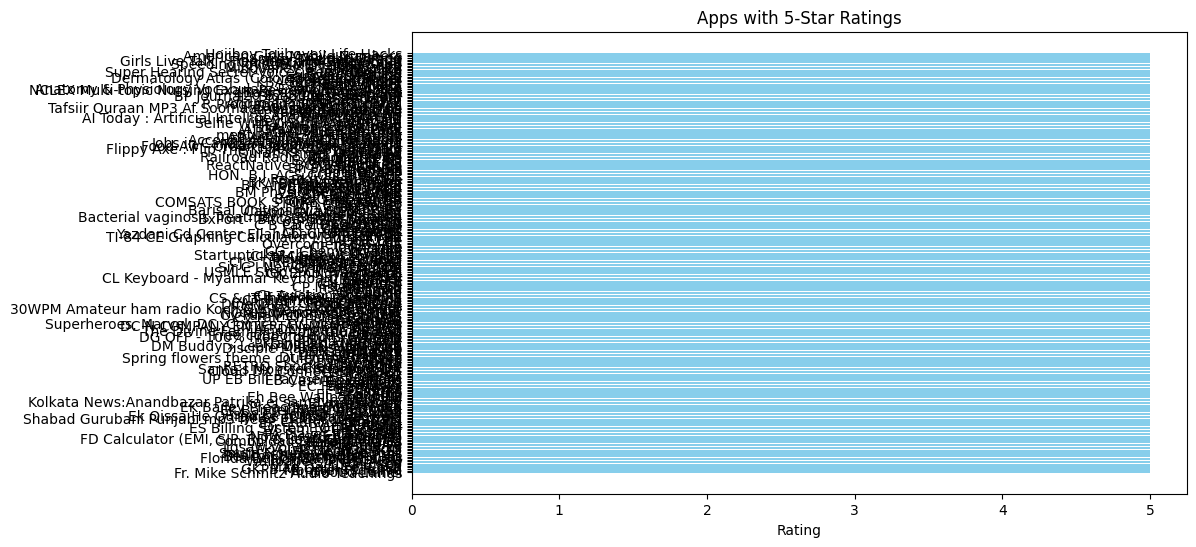

In [16]:

# Filter the DataFrame for apps with 5-star ratings
five_star_apps = df[df['Rating'] == 5.0]

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(five_star_apps['App'], five_star_apps['Rating'], color='skyblue')
plt.xlabel('Rating')
plt.title('Apps with 5-Star Ratings')
plt.gca().invert_yaxis()  # Invert y-axis to display highest rating at the top
plt.show()


# 6.Which are the top 10 mob apps based on ratings?

In [17]:
# Sort the DataFrame by 'Rating' column in descending order and select the top 10 rows
top_10_apps = df.sort_values(by='Rating', ascending=False).head(10)

# Display the top 10 apps
print(top_10_apps[['App', 'Rating']])


                                           App  Rating
10472  Life Made WI-Fi Touchscreen Photo Frame    19.0
9511                  Ek Bander Ne Kholi Dukan     5.0
10166                     FA Player Essentials     5.0
7895                Dine In CT - Food Delivery     5.0
5118                          Eternal Light AG     5.0
6953            BxPort - Bitcoin Bx (Thailand)     5.0
5125                     Ag Valley Cooperative     5.0
7896                               CT Checkout     5.0
5139                              Chenoweth AH     5.0
5145                          Arrowhead AH App     5.0


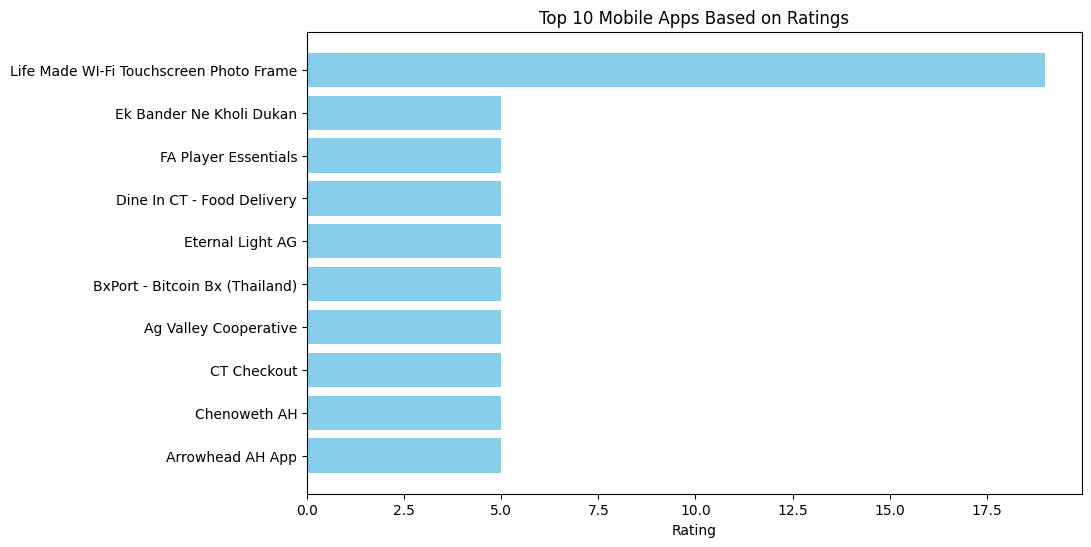

In [18]:

# Sort the DataFrame by 'Rating' column in descending order and select the top 10 rows
top_10_apps = df.sort_values(by='Rating', ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_10_apps['App'], top_10_apps['Rating'], color='skyblue')
plt.xlabel('Rating')
plt.title('Top 10 Mobile Apps Based on Ratings')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest rating at the top
plt.show()
